In [36]:
# Imports

import pickle
import numpy as np
import xlsxwriter as xl
import nltk
from nltk import pos_tag
from nltk import word_tokenize
import scipy.io as sio
import itertools
from itertools import chain
import string
import pandas as pd
import xlrd
from collections import Counter
from nltk.stem import WordNetLemmatizer
lemmas=WordNetLemmatizer()

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

### MATLAB files needed for this script

In [2]:
# keyPassageCategory.m
# labelSentences
# labelsPassageCategory
# labelsPassageForEachSentence
# labelsPassages
# labelsSentences

### Importing the sentences

In [5]:
f1g = [] #file 1 good
numSentences = 243
with open('stimuli_243sentences.txt', 'r') as file:
    for j in range(numSentences):
        line = file.readline().strip('\n')
        line = line.split(' ') # Every word as a string

        f1g.append(line)
            
#print("File 1 good list:")  
#print(f1g)

### Count number of words

In [6]:
with open('stimuli_243sentences.txt', 'r') as file1:
    f1 = file1.readlines()
    
f1e = []
f1e2 = []
for sentence in f1:
    sentence = sentence.split(' ')
    f1e.append(sentence)
    for word in sentence:
        word = word.replace('\n','')
        f1e2.append(word)
        
print(f1e[0:4])
print(f1e2[0:4])
print(len(f1e2)) # Contains number of words

[['Beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats.\n'], ['It', 'is', 'in', 'every', "beekeeper's", 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen.\n'], ['As', 'a', 'passive', 'form', 'of', 'agriculture,', 'it', 'does', 'not', 'require', 'that', 'native', 'vegetation', 'be', 'cleared', 'to', 'make', 'way', 'for', 'crops.\n'], ['Beekeepers', 'also', 'discourage', 'the', 'use', 'of', 'pesticides', 'on', 'crops,', 'because', 'they', 'could', 'kill', 'the', 'honeybees.\n']]
['Beekeeping', 'encourages', 'the', 'conservation']
3193


In [7]:
avgWordSent = len(f1e2)/numSentences
print(avgWordSent)

13.139917695473251


### POS tagging 

In [8]:
taglst = []
for sentence in f1g:
    tag = pos_tag(sentence)
    taglst.append(tag)

#print(taglst[0:2])
#print(taglst[0][0])

In [9]:
print('Taglist:')
print(taglst[0])

Taglist:
[('Beekeeping', 'VBG'), ('encourages', 'VBZ'), ('the', 'DT'), ('conservation', 'NN'), ('of', 'IN'), ('local', 'JJ'), ('habitats.', 'NN')]


### Set list

In [10]:
setlst = [3]*3193

### Sentence number list

In [18]:
# Make list of sentence number and passage number
# For first sentence, add 1. Second sentence, add 2 for each word

print(f1g[0:3]) #append it here

snlst = [] #sentence number list
ncounter = 1
for sentence in f1g:
    for word in sentence:
        snlst.append(ncounter)

        for char in word:
            if char != '.':
                pass
            elif char == '.':
                ncounter += 1
                
print(snlst[0:20])


[['Beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats.'], ['It', 'is', 'in', 'every', "beekeeper's", 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen.'], ['As', 'a', 'passive', 'form', 'of', 'agriculture,', 'it', 'does', 'not', 'require', 'that', 'native', 'vegetation', 'be', 'cleared', 'to', 'make', 'way', 'for', 'crops.']]
[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [15]:
print(len(snlst))

3193


### Labels passages

In [23]:
labelsPassages = sio.loadmat('labelsPassageForEachSentence')

lP = labelsPassages['labelsPassageForEachSentence']
lP = np.hsplit(lP,1)

lplst = np.array(lP).tolist()
lplst = lplst[0][0]

#print(lplst)

# Adding the passage number to words, and not sentences
lplst_word = []
counter = 0
for sentence in f1g:
    if counter == 245:
        break
    for word in sentence:
        lplst_word.append(lplst[counter])
    counter += 1
    
#print(lplst_word)

In [30]:
# Adding the passage number to words, and not sentences

lplst_word2 = []
counter = 0
for sentence in f1g:
    if counter == numSentences + 2:
        break
    for word in sentence:
        lplst_word2.append(lplst[counter])
    counter += 1
    
print(len(lplst_word))

3193


### Sentence no. within passage

In [31]:
# Creating a tuple of the word list and the lplst_word (labels passages) list)

wordlst = []
for sentence in f1g:
    for word in sentence:
        wordlst.append(word)

print(len(wordlst)) #same length
print(len(lplst_word))

word_lp_tup = list(zip(wordlst,lplst_word))
print(word_lp_tup[0:45])

seen = set()

counter = 1
snplst = [] #sentence number within passage list
for tup in word_lp_tup:
    first = tup[0] #first index of the tuple, i.e. the word
    second = tup[1]

    if second not in seen:
        counter = 1 #restarting the counter if the passage number changes
        
    seen.add(second)
    snplst.append(counter)

    for char in first:
        if char != '.':
            continue
        if char == '.':
            counter += 1


3193
3193
[('Beekeeping', 1), ('encourages', 1), ('the', 1), ('conservation', 1), ('of', 1), ('local', 1), ('habitats.', 1), ('It', 1), ('is', 1), ('in', 1), ('every', 1), ("beekeeper's", 1), ('interest', 1), ('to', 1), ('conserve', 1), ('local', 1), ('plants', 1), ('that', 1), ('produce', 1), ('pollen.', 1), ('As', 1), ('a', 1), ('passive', 1), ('form', 1), ('of', 1), ('agriculture,', 1), ('it', 1), ('does', 1), ('not', 1), ('require', 1), ('that', 1), ('native', 1), ('vegetation', 1), ('be', 1), ('cleared', 1), ('to', 1), ('make', 1), ('way', 1), ('for', 1), ('crops.', 1), ('Beekeepers', 1), ('also', 1), ('discourage', 1), ('the', 1), ('use', 1)]


### Word number within sentence

In [32]:
counter_no = 1
wnslst = [] # word number sentence list
for word in wordlst:
    
    wnslst.append(counter_no)
    counter_no += 1
    for char in word:
        if char != '.':
            continue
        if char == '.':
            counter_no = 1

print(wnslst[0:50])

[1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### Broad topic for each sentence

In [34]:
keyPassageCategory = ['astronaut','beekeeping','blindness','bone_fracture','castle','computer_graphics','dreams','gambling','hurricane','ice_cream','infection','law_school','lawn_mower','opera','owl','painter','pharmacist','polar_bear','pyramid','rock_climbing','skiing','stress','taste','tuxedo']

countlst = list(range(1,73))

# Making a tuple of categories and numbering

pascat = list(zip(countlst,keyPassageCategory))

print(pascat)

[(1, 'astronaut'), (2, 'beekeeping'), (3, 'blindness'), (4, 'bone_fracture'), (5, 'castle'), (6, 'computer_graphics'), (7, 'dreams'), (8, 'gambling'), (9, 'hurricane'), (10, 'ice_cream'), (11, 'infection'), (12, 'law_school'), (13, 'lawn_mower'), (14, 'opera'), (15, 'owl'), (16, 'painter'), (17, 'pharmacist'), (18, 'polar_bear'), (19, 'pyramid'), (20, 'rock_climbing'), (21, 'skiing'), (22, 'stress'), (23, 'taste'), (24, 'tuxedo')]


In [37]:
labelsPassageCategory = sio.loadmat('labelsPassageCategory')

lPC = labelsPassageCategory['labelsPassageCategory']
lPC = np.hsplit(lPC,1)

lpclst = np.array(lPC).tolist()
lpclst = lpclst[0]

lpclst = list(chain.from_iterable(lpclst)) # Accessing the nested lists
print(lpclst)


[2, 2, 2, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 13, 13, 13, 1, 1, 1, 6, 6, 6, 12, 12, 12, 17, 17, 17, 22, 22, 22, 24, 24, 24, 3, 3, 3, 23, 23, 23, 4, 4, 4, 11, 11, 11, 14, 14, 14, 16, 16, 16, 15, 15, 15, 18, 18, 18, 5, 5, 5, 19, 19, 19, 20, 20, 20, 21, 21, 21]


In [40]:
lpclst_word = []

for value in lplst_word: #Iterating through the passage number list
    lpclst_word.append(lpclst[value-1]) #Appending values from the lpclst, which contains category labels
    
# Need to match the category label list: lpclst with the actual category names, keyPassageCategory

catlst = []

for value in lpclst_word:
    for tup in pascat:
        first = tup[0]
        second = tup[1]
        
        if value == first:
            catlst.append(second)

print(len(catlst))

3193


### Word length

In [41]:
# Finding all characters (letters, numbers and punctuation) in the corpus

# Creating a character list

charlst = []
for word in wordlst:
    for char in word:
        charlst.append(char)

uniquechar = set(charlst)
print(uniquechar)

nonletters = ['-','.',"'",'7',',','8','4',':','0','$','1','9']


{'T', 'e', 'k', 'W', 'P', 'S', 'a', 'j', 'm', 'u', '$', ',', 'R', 'r', '9', 'l', 'G', 'b', 'F', 'o', 'f', 'I', '-', '7', 'B', 'i', 'w', '.', 'L', 'p', 'g', 'h', 'x', 's', 'C', 'y', 'H', 'X', "'", 'O', 'd', ':', 'z', 'q', 'U', 't', 'c', 'E', '1', '4', 'v', 'A', 'N', 'D', 'n', 'M', '8', '0'}


### Stripping punctuation and capitalized letters

In [42]:
# Stripping wordlist for punctuation

wordlst_np = wordlst # wordlist no punctuation

wordlst_np = ["".join( j for j in i if j not in string.punctuation) for i in wordlst_np]     

#print(wordlst_np[50:900]) #Stripped list!

charcount = 0
wordlen = []
for word in wordlst_np:
    for char in word:
        charcount += 1
    wordlen.append(charcount)
    charcount = 0

print(len(wordlen))

3193


In [43]:
# Removing capitalized letters
wordlst_l = [] #wordlist lowercase
for word in wordlst_np:
    lower_word = word.lower()
    wordlst_l.append(lower_word)

#print(wordlst_l[90:130])

In [44]:
# Removing capitalized letters from original list, thus with punctuation
wordlst_lower = [] #wordlist lowercase
for word in wordlst:
    lower_word = word.lower()
    wordlst_lower.append(lower_word)

### Making lemmatized list

In [45]:
# Checking all the different POS tags in taglst

unique_tags = []
for sent in taglst:
    for tup in sent:
        second = tup[1]
        unique_tags.append(second)

#print(unique_tags)
unique_tags = set(unique_tags)
print(unique_tags)
print(sorted(unique_tags))

{'MD', 'VBP', 'VBG', 'EX', 'TO', 'VBZ', 'RB', 'PRP', 'PRP$', 'IN', 'VBN', 'RBS', 'JJ', 'WP', 'NNS', 'CC', 'RBR', 'NNP', 'RP', 'CD', 'WDT', 'WRB', 'VBD', 'VB', 'JJR', 'NN', 'DT', 'JJS'}
['CC', 'CD', 'DT', 'EX', 'IN', 'JJ', 'JJR', 'JJS', 'MD', 'NN', 'NNP', 'NNS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'TO', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WRB']


In [20]:
# Out of the tags, I say the following are nouns:
# NNS, NN, NNP, 
# Verbs:
# VBP, VBG, VBD, VBN, VBZ, VB

### Create list with the POS tags and choose which ones are nouns/verbs

In [46]:
# Create a list with only POS tags and zip it together with the wordlst_l
POS_tags=[]
# Make tags lowercase
for entry in taglst:
    for tup in entry:
        tag=tup[1]
        #tag = tag.lower()
        POS_tags.append(tag)

# make all noun tags to 'n' and all verb tags to 'v' for the lemmatizer to work
POS_nouns=['NN','NNS','NNP']
POS_verbs=['VBD','VBG','VBN','VBP','VBZ'] #did not add VB=verb base form
POS_tags_s=[] #POS tags short


### Lemmatize nouns + verbs

In [47]:
# for nouns
for tag in POS_tags:
    tagfound_N=[i for i, j in enumerate(POS_nouns) if j == tag]
#    tagfound_V=[k for k, g in enumerate(POS_verbs) if g == tag]

    if len(tagfound_N)>0:
        POS_tags_s.append('n')        
    if len(tagfound_N) == 0:
        POS_tags_s.append(tag)

# for verbs
POS_tags2=[]
for tag in POS_tags_s:
    tagfound_V=[k for k, g in enumerate(POS_verbs) if g == tag]
    if len(tagfound_V)>0:
        POS_tags2.append('v')        
    if len(tagfound_V) == 0:
        POS_tags2.append(tag)
        
#print(POS_tags2)

taglst_l = list(zip(wordlst_l,POS_tags2))       
print(taglst_l[0:20])
    

[('beekeeping', 'v'), ('encourages', 'v'), ('the', 'DT'), ('conservation', 'n'), ('of', 'IN'), ('local', 'JJ'), ('habitats', 'n'), ('it', 'PRP'), ('is', 'v'), ('in', 'IN'), ('every', 'DT'), ('beekeepers', 'n'), ('interest', 'n'), ('to', 'TO'), ('conserve', 'VB'), ('local', 'JJ'), ('plants', 'n'), ('that', 'WDT'), ('produce', 'v'), ('pollen', 'n')]


In [48]:
# Converts all nouns and verbs to lemmatized versions
wordlst_lem=[] #name of the list with lemma words! 

for counter,tag in enumerate(taglst_l):
    if tag[1] == 'n':
        lem=lemmas.lemmatize(tag[0],'n')
        wordlst_lem.append(lem)
    if tag[1] == 'v':
        lem=lemmas.lemmatize(tag[0],'v')
        wordlst_lem.append(lem)
    if tag[1] != 'n' and tag[1]!='v':
        wordlst_lem.append(tag[0])

print(wordlst_lem[200:240])
print(taglst_l[200:240])


['each', 'morning', 'participant', 'in', 'the', 'study', 'have', 'to', 'write', 'down', 'their', 'dream', 'experience', 'from', 'the', 'previous', 'night', 'they', 'record', 'if', 'they', 'recall', 'any', 'dream', 'and', 'describe', 'each', 'dream', 'and', 'its', 'emotional', 'intensity', 'participant', 'then', 'assign', 'each', 'dream', 'to', 'a', 'category']
[('each', 'DT'), ('morning', 'n'), ('participants', 'n'), ('in', 'IN'), ('the', 'DT'), ('study', 'n'), ('had', 'v'), ('to', 'TO'), ('write', 'VB'), ('down', 'RP'), ('their', 'PRP$'), ('dream', 'n'), ('experience', 'n'), ('from', 'IN'), ('the', 'DT'), ('previous', 'JJ'), ('night', 'n'), ('they', 'PRP'), ('recorded', 'v'), ('if', 'IN'), ('they', 'PRP'), ('recalled', 'v'), ('any', 'DT'), ('dreams', 'n'), ('and', 'CC'), ('described', 'v'), ('each', 'DT'), ('dream', 'n'), ('and', 'CC'), ('its', 'PRP$'), ('emotional', 'JJ'), ('intensity', 'n'), ('participants', 'n'), ('then', 'RB'), ('assigned', 'v'), ('each', 'DT'), ('dream', 'n'), ('

In [49]:
# compare entries in lem list and non-lem list

diff_lem=[i for i, j in zip(wordlst_l, wordlst_lem) if i != j]

print(len(diff_lem)) #i.e. number of the same entries is 3464. Entries that were edited: 4537-3464=1073
print(len(wordlst_lem))
print(len(wordlst_l))

657
3193
3193


In [73]:
657*100/3193


20.57626056999687

### Lemmatize only nouns

In [50]:
taglst_nouns = list(zip(wordlst_l,POS_tags_s))       
print(taglst_nouns[0:20])

[('beekeeping', 'VBG'), ('encourages', 'VBZ'), ('the', 'DT'), ('conservation', 'n'), ('of', 'IN'), ('local', 'JJ'), ('habitats', 'n'), ('it', 'PRP'), ('is', 'VBZ'), ('in', 'IN'), ('every', 'DT'), ('beekeepers', 'n'), ('interest', 'n'), ('to', 'TO'), ('conserve', 'VB'), ('local', 'JJ'), ('plants', 'n'), ('that', 'WDT'), ('produce', 'VBP'), ('pollen', 'n')]


In [51]:
# Converts all nouns to lemmatized versions
wordlst_lem_n=[]
for counter,tag in enumerate(taglst_nouns):
    if tag[1] == 'n':
        lem=lemmas.lemmatize(tag[0],'n')
        wordlst_lem_n.append(lem)
    if tag[1] != 'n':
        wordlst_lem_n.append(tag[0])

print(wordlst_l[240:280])
print(wordlst_lem_n[240:280])


['such', 'as', 'a', 'flying', 'dream', 'a', 'bad', 'dream', 'or', 'a', 'nightmare', 'every', 'night', 'while', 'we', 'sleep', 'our', 'minds', 'are', 'as', 'active', 'as', 'when', 'we', 'are', 'awake', 'we', 'dream', 'throughout', 'the', 'night', 'in', 'cycles', 'of', 'about', 'ninety', 'minutes', 'each', 'images', 'feelings']
['such', 'as', 'a', 'flying', 'dream', 'a', 'bad', 'dream', 'or', 'a', 'nightmare', 'every', 'night', 'while', 'we', 'sleep', 'our', 'mind', 'are', 'as', 'active', 'as', 'when', 'we', 'are', 'awake', 'we', 'dream', 'throughout', 'the', 'night', 'in', 'cycle', 'of', 'about', 'ninety', 'minute', 'each', 'image', 'feeling']


In [52]:
# compare entries in lem list and non-lem list

diff_lem_n=[i for i, j in zip(wordlst_l, wordlst_lem_n) if i != j]

print(len(diff_lem_n)) #i.e. Entries that were edited: 508
print(len(wordlst_lem_n))
print(len(wordlst_l))

308
3193
3193


###  NA count function

In [53]:
# Function for counting NA values in tuple

def countTupNA(tuplelist):
    '''Count the number of NA values in a tuple consisting of word and value'''
    NAcounter = 0
    for tup in tuplelist:
        second = tup[1]
        if second.count('#NA') == 1:
            NAcounter +=1
    
    return NAcounter

In [54]:
# Function for counting NA values in list

def countNA(lst):
    '''Count the number of NA values in a tuple consisting of word and value'''
    NAcounter = 0
    for value in lst:
        if value.count('#NA') == 1:
            NAcounter +=1
    
    return NAcounter

### Feature function: AoA, valence, arousal, prevalence, lexical frequency, concreteness, possible POS tags, ambiguity

In [55]:
def getFeature(wordlist,feature):
    '''Function for acquiring AoA values. 
    
    Input: 1) list of words. 2) feature: AoA, valence, arousal, prevalence,
    lexical frequency, concreteness, possible POS tags, ambiguity

    Return: 1) list of solely feature values
            2) tuple corresponding of the word and feature value'''
    firstVal = []
    secondVal = []
    
    # AoA EXCEL FILE #
    if feature == 'aoa':
        excelFile = pd.read_excel('AoA.xlsx')
        formatExcel = ['Word', 'Rating.Mean']
        wordVal = excelFile[formatExcel]

        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['Rating.Mean']
            secondVal.append(second)
    
    # Valence EXCEL FILE #
    if feature == 'valence':
        excelFile = pd.read_excel('valence.xlsx')
        formatExcel = ['Word', 'V.Mean.Sum']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['V.Mean.Sum']
            secondVal.append(second)
    
    # Arousal EXCEL FILE #
    if feature == 'arousal':
        excelFile = pd.read_excel('valence.xlsx')
        formatExcel = ['Word', 'A.Mean.Sum']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['A.Mean.Sum']
            secondVal.append(second)
            
    # Prevalence EXCEL FILE #
    if feature == 'prevalence':
        excelFile = pd.read_excel('prevalence.xlsx')
        formatExcel = ['Word', 'Prevalence']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['Prevalence']
            secondVal.append(second)
            
    # Lexical frequency EXCEL FILE #
    if feature == 'frequency':
        excelFile = pd.read_excel('wordmatch.xlsx')
        formatExcel = ['Word', 'Lexical_frequency']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['Lexical_frequency']
            secondVal.append(second)
            
    # Concreteness EXCEL FILE #
    if feature == 'concreteness':
        excelFile = pd.read_excel('concreteness.xlsx')
        formatExcel = ['Word', 'Conc.M']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['Conc.M']
            secondVal.append(second)
    
    # Possible EXCEL FILE (possible tags) #
    if feature == 'possible':
        excelFile = pd.read_excel('wordmatch.xlsx')
        formatExcel = ['Word', 'All_PoS_SUBTLEX']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['All_PoS_SUBTLEX']
            secondVal.append(second)
            
    # Ambiguity EXCEL FILE #
    if feature == 'ambiguity':
        excelFile = pd.read_excel('wordmatch.xlsx')
        formatExcel = ['Word', 'Percentage_dom_PoS']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['Percentage_dom_PoS']
            secondVal.append(second)
    
    wordvals_feature = []
    wordlst_feature = []
    for word in wordlist:
        wordfound_feature=[i for i, j in enumerate(firstVal) if j == word]
        wordval_feature=[secondVal[i] for i, j in enumerate(firstVal) if j == word]

        if len(wordfound_feature) > 0:
            wordvals_feature.append(wordval_feature)
            wordlst_feature.append(word)

        if len(wordfound_feature) == 0:
            wordvals_feature.append(['#NA'])
            wordlst_feature.append(word)

    final_feature = list(zip(wordlst_feature,wordvals_feature))
    
    return wordvals_feature, final_feature


### Content / function

In [56]:
# Content: nouns, verbs, adjectives and adverbs. 1
# Function: the rest. 0

In [57]:
print(taglst[0])

[('Beekeeping', 'VBG'), ('encourages', 'VBZ'), ('the', 'DT'), ('conservation', 'NN'), ('of', 'IN'), ('local', 'JJ'), ('habitats.', 'NN')]


In [58]:
# Check which different POS-tags I have

seenPOS=set()
first_cf = []
second_cf = []

for sentence in taglst:
    for tup in sentence:
        first = tup[0]
        first_cf.append(first)
    
        second = tup[1]
        seenPOS.add(second)
        second_cf.append(second)

content_lst = ['VB','NN','NNP','NNS','JJ','JJS','JJR','VBD','VBG','VBN','VBP','VBZ','RB','RBR','RBS','WRB']
print(sorted(seenPOS))
print(sorted(content_lst))


['CC', 'CD', 'DT', 'EX', 'IN', 'JJ', 'JJR', 'JJS', 'MD', 'NN', 'NNP', 'NNS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'TO', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WRB']
['JJ', 'JJR', 'JJS', 'NN', 'NNP', 'NNS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WRB']


In [59]:
binary_lst = []

for tag in second_cf:
    
    tagfound=[i for i, j in enumerate(content_lst) if j == tag]
    
    if len(tagfound) == 1:
        binary_lst.append(1)
    
    
    if len(tagfound) == 0:
        binary_lst.append(0)


In [60]:
print(len(binary_lst))

3193


In [61]:
# How many content vs function?

In [64]:
print(binary_lst.count(1))
print(2002*100/3193)

2002
62.69965549639837


In [65]:
print(binary_lst.count(0))
print(1191*100/3193)

1191
37.30034450360163


### Lexical surprisal - non lemmatized

In [69]:
# https://colala.bcs.rochester.edu/data/PiantadosiTilyGibson2011/Google10L-1T/
# the higher lexical surprisal rating, the more surprising? 

In [66]:
# for the different surprisal files, concatenate the lists

file1=open('surprisal-1.txt','r')
text1=file1.read()
#print(text)
file1.close()

textspl1=text1.split()

file2=open('surprisal-2.txt','r')
text2=file2.read()
#print(text)
file2.close()

textspl2=text2.split()

file3=open('surprisal-3.txt','r')
text3=file3.read()
file3.close()

textspl3=text3.split()

file4=open('surprisal-4.txt','r')
text4=file4.read()

textspl4=text4.split()
file4.close()

merged_lst = textspl1+textspl2+textspl3+textspl4

In [67]:
wordrabbit=['honey-making']
surpVals=[]

for w in wordlst_l:

    str1='"'+w+'"';
    
    #fw=[i for i, j in enumerate(textspl) if j=='"'+w+'"']
    try:
        fw=merged_lst.index(str1)
    except:
        surpVals.append('[#NA]')
        continue

    #print(fw)

    surp_val=merged_lst[fw+3]
    #print(surp_val)

    surpVals.append(surp_val)


In [68]:
print(surpVals[0:20])

['21.130', '16.828', '4.687', '14.483', '5.502', '11.104', '17.376', '7.727', '6.985', '6.137', '11.621', '21.652', '12.275', '5.618', '18.501', '11.104', '14.018', '7.454', '14.040', '18.147']


In [69]:
# Testing number of NA

counter = 0
for value in surpVals:
    if value.count('#NA') ==1:
        counter +=1

print(counter)

10


In [ ]:
# Find unique NA surprisal values

In [70]:
surpTup = list(zip(wordlst_l,surpVals))


In [71]:
print(len(surpTup))

print(countNA(surpVals))

3193
10


In [72]:
NA_wordlst_sur=[]

for tup in surpTup:
    #print(tup[1])
    if tup[1]=='[#NA]':
        NA_wordlst_sur.append(tup[0])

u_sur=np.unique(NA_wordlst_sur)
print(u_sur)
print(NA_wordlst_sur)

#print(NA_wordlst_sur) #Remember some of the unique words are numbers! 
#print(len(u_sur))

nonums_sur=[x for x in u_sur if not any(x1.isdigit() for x1 in x)]
print(len(nonums_sur))

['10' '10000' '1970s' '40000' '8' 'foodscarce' 'halfclosing' 'halffrozen'
 'honeymaking' 'whippedin']
['honeymaking', '40000', '10000', 'halffrozen', 'whippedin', '8', '10', '1970s', 'halfclosing', 'foodscarce']
5


### Lexical surprisal - lemmatized - not run

In [ ]:
surpVals_lem=[]

for w in wordlst_lem:
    str1='"'+w+'"';
    try:
        fw=merged_lst.index(str1)
    except:
        surpVals_lem.append('[#NA]')
        continue

    surp_val=merged_lst[fw+3]

    surpVals_lem.append(surp_val)


### Analyze lexical features 

In [74]:
aoaVals, aoaTup = getFeature(wordlst_l,'aoa')
aoaVals_lem, aoaTup_lem = getFeature(wordlst_lem,'aoa')

valVals, valTup = getFeature(wordlst_l,'valence')
valVals_lem, valTup_lem = getFeature(wordlst_lem,'valence')

arVals, arTup = getFeature(wordlst_l,'arousal')
arVals_lem, arTup_lem = getFeature(wordlst_lem,'arousal')

prevVals, prevTup = getFeature(wordlst_l,'prevalence')
prevVals_lem, prevTup_lem = getFeature(wordlst_lem,'prevalence')

freqVals, freqTup = getFeature(wordlst_l,'frequency')
freqVals_lem, freqTup_lem = getFeature(wordlst_lem,'frequency')

concVals, concTup = getFeature(wordlst_l,'concreteness')
concVals_lem, concTup_lem = getFeature(wordlst_lem,'concreteness')

possVals, possTup = getFeature(wordlst_l,'possible')
possVals_lem, possTup_lem = getFeature(wordlst_lem,'possible')

ambVals, ambTup = getFeature(wordlst_l,'ambiguity')
ambVals_lem, ambTup_lem = getFeature(wordlst_lem,'ambiguity')


In [82]:
# Create merged list (tested with concreteness)
mergeCount = 0
mergeLst = []
NAcounter = 0
for value in concVals:    
    if value != ['#NA']:
        mergeLst.append(value)
    
    if value == ['#NA']:
        lemVal = concVals_lem[mergeCount]
        mergeLst.append(lemVal)
        NAcounter += 1
        
    mergeCount += 1
 
# print(mergeLst[4500:])
# print(NAcounter)
# print(mergeCount)
# print(len(mergeLst))
# print(len(concVals_lem))


In [138]:
print(freqTup)

[('beekeeping', [0.477121254719662]), ('encourages', [1.51851393987789]), ('the', [6.1766436197553]), ('conservation', [1.51851393987789]), ('of', [5.77117577156368]), ('local', [3.32817566143832]), ('habitats', [1.07918124604762]), ('it', [5.98394771743588]), ('is', [5.662440491974]), ('in', [5.69761724386273]), ('every', [4.44728209775698]), ('beekeepers', [0.698970004336019]), ('interest', [3.41480627950101]), ('to', [6.06317229855216]), ('conserve', [1.65321251377534]), ('local', [3.32817566143832]), ('plants', [2.68930885912362]), ('that', [5.8571382268439]), ('produce', [2.75204844781944]), ('pollen', [1.79934054945358]), ('as', [5.05334355121762]), ('a', [6.01752581716572]), ('passive', [2.04921802267018]), ('form', [3.3386556655787]), ('of', [5.77117577156368]), ('agriculture', [1.75587485567249]), ('it', [5.98394771743588]), ('does', [4.53151723545311]), ('not', [5.44196834892386]), ('require', [2.73479982958885]), ('that', [5.8571382268439]), ('native', [2.62531245096167]), (

### Merge lists function

In [76]:
def mergeList(nonLemVals,lemVals):
    '''Input: Two lists.
       Return: If list 1 contains NA vals, the NA val is replaced by the value in list 2 (either numerical val or #NA again)
    '''

    mergeCount = 0
    mergeLst = []
    NAcounter = 0
    for value in nonLemVals:    
        if value != ['#NA']:
            mergeLst.append(value)

        if value == ['#NA']:
            lemVal = lemVals[mergeCount]
            mergeLst.append(lemVal)
            NAcounter += 1
        mergeCount += 1
        
    return mergeLst

In [78]:
conmerge = mergeList(concVals,concVals_lem)

In [80]:
# There are two fewer NA values in the merged lists, than in the lemmatized lists. Due to words that were lemmatized, 
# and can't be found in the data base: specie (non lemmatized: species) and plier (pliers). Thus two NA vals less in merged list.

# print(conmerge)
# print(NAcount)
print(countNA(conmerge))
print(countNA(concVals_lem))
# print(countNA(mergeLst))

# print(concVals_lem[4500:])


# diff_NAs =[i for i, j in zip(mergeLst, concVals_lem) if i != j]
# #print(diff_NAs)


70
72


In [86]:
# Testing the difference in NA vals between merged list and lemmatized list
# enum = []
# for count, ii in enumerate(mergeLst):

#     if ii == ['#NA']:
#         enum.append(count)
        
# print(enum)

# print(' ')
# enum2 = []
# for count, ii in enumerate(concVals_lem):

#     if ii == ['#NA']:
#         enum2.append(count)

# print(enum2)

# diff_NA =[i for i, j in zip(enum, enum2) if i != j]
# print(diff_NA)

In [85]:
# print(mergeLst[1300:1310])
# print(concVals_lem[1300:1310])
# print(concTup_lem[1300:1310])
# print(concTup[1300:1310])

# print(countTupNA(concTup_lem))


In [255]:
armerge = mergeList(arVals,arVals_lem)

In [261]:
print(countNA(armerge))
print(countNA(arVals_lem)) #4 vals less NA in merged list

enum = []
for count, ii in enumerate(armerge):
    if ii == ['#NA']:
        enum.append(count)
        
#print(enum)

print(' ')
enum2 = []
for count, ii in enumerate(arVals_lem):
    if ii == ['#NA']:
        enum2.append(count)

#print(enum2)

diff_NA =[i for i, j in zip(enum, enum2) if i != j]
#print(diff_NA)

print(armerge[720:730])
print(arVals_lem[720:730])
print(arTup_lem[720:730])
print(arTup[720:730])



1897
1901
 
[[3.91], ['#NA'], ['#NA'], [4.56], [4.18], [3.55], ['#NA'], [4.91], ['#NA'], ['#NA']]
[[3.91], ['#NA'], ['#NA'], [4.56], [4.18], ['#NA'], ['#NA'], [4.91], ['#NA'], ['#NA']]
[('tool', [3.91]), ('such', ['#NA']), ('as', ['#NA']), ('hammer', [4.56]), ('saw', [4.18]), ('plier', ['#NA']), ('and', ['#NA']), ('plane', [4.91]), ('a', ['#NA']), ('luthier', ['#NA'])]
[('tools', ['#NA']), ('such', ['#NA']), ('as', ['#NA']), ('hammers', ['#NA']), ('saws', ['#NA']), ('pliers', [3.55]), ('and', ['#NA']), ('planes', ['#NA']), ('a', ['#NA']), ('luthier', ['#NA'])]


### Merge all non-lemmatized and lemmatized lists

In [87]:
aoaMerge = mergeList(aoaVals,aoaVals_lem)

valMerge = mergeList(valVals,valVals_lem)

arMerge = mergeList(arVals,arVals_lem)

prevMerge = mergeList(prevVals,prevVals_lem)

freqMerge = mergeList(freqVals,freqVals_lem)

concMerge = mergeList(concVals,concVals_lem)

possMerge = mergeList(possVals,possVals_lem)

ambMerge = mergeList(ambVals,ambVals_lem)

#surpMerge = mergeList(surpVals,surpVals_lem) # Did not run the lemmatized 


In [88]:
print(countNA(ambMerge))
print(countNA(ambVals_lem))



21
21


### Excel appending - function

In [89]:
alphabetNum = list(range(0,27))
letterCount = dict(zip(string.ascii_uppercase, alphabetNum))

def writeCol(colnumber,colheader,appendlist):
    # 'C1','Content/function'
    sheet1.write(colnumber,colheader)
    add_counter = 0  
    
    numInput = colnumber[:-1]
    numAppend = letterCount.get(numInput) # Which column to append to
    
    for number in appendlist:
        add_counter += 1
        sheet1.write(add_counter,numAppend,number)


In [90]:
alphabetNum = list(range(0,27))
letterCount = dict(zip(string.ascii_uppercase, alphabetNum))

def writeColList(colnumber,colheader,appendlist):
    '''For list-type items, i.e. if lists in lists'''
    sheet1.write(colnumber,colheader)
    add_counter = 0  
    
    numInput = colnumber[:-1]
    numAppend = letterCount.get(numInput) # Which column to append to
    
    for number in appendlist:
        newNum = number[0]
        add_counter += 1
        sheet1.write(add_counter,numAppend,newNum)


### Write to excel

In [92]:
wb = xl.Workbook('set3.xlsx')
sheet1 = wb.add_worksheet('sheet1')

# Appending tuple with POS and words
sheet1.write('A1','Word')
sheet1.write('B1','POS')
add_counter1 = 0
for sentence in taglst:
    for tupleentry in sentence:
        add_counter1 += 1
        sheet1.write_row(add_counter1,0,tupleentry)
        
# Appending lists  
writeCol('C1','Content/function',binary_lst)
writeCol('D1','Set no.',setlst)
writeCol('E1','Sentence no.',snlst)
writeCol('F1','Passage no.',lplst_word)
writeCol('G1','Sentence no. within passage',snplst)
writeCol('H1','Word no. within sentence',wnslst)
writeCol('I1','Broad topic',catlst)
sheet1.write('J1','Specific topic')
writeCol('K1','Word length',wordlen)

# Order: 'aoa','conc','prev','ar','vale','amb','freq','sur' - in the excel, length comes first! 'len'
writeColList('L1','Age of acquisition',aoaMerge)
writeColList('M1','Concreteness',concMerge)
writeColList('N1','Prevalence',prevMerge)
writeColList('O1','Arousal',arMerge)
writeColList('P1','Valence',valMerge)
writeColList('Q1','Ambiguity: all possible tags',possMerge)
writeColList('R1','Ambiguity: percentage of dominant',ambMerge)
writeColList('S1','Log lexical frequency',freqMerge)
writeCol('T1','Lexical surprisal',surpVals)

### Creating bar plot for a. proportion of total words with NAs for each feature

#### Contains numbers as "words"

In [ ]:
# AoA, concreteness, prevalence, arousal, valence, ambiguity, log lexical freq, lexical surprisal, len

In [93]:
aoaNA = countNA(aoaMerge)
concNA = countNA(concMerge)
prevNA = countNA(prevMerge)
arNA = countNA(arMerge)
valNA = countNA(valMerge)
ambNA = countNA(ambMerge)
freqNA = countNA(freqMerge)
surpNA = countNA(surpVals)
lenNA = 0


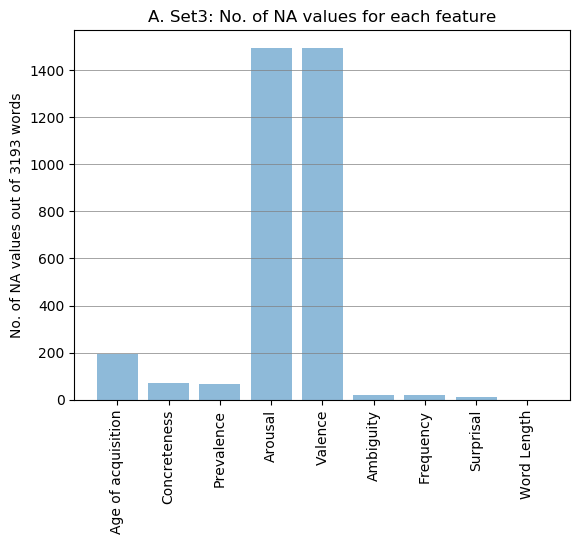

193 70 67 1494 1494 21 21 10 0


In [152]:
# Bar plot code 

objects = ('Age of acquisition', 'Concreteness', 'Prevalence', 'Arousal', 'Valence','Ambiguity','Frequency','Surprisal','Word Length') #'Ambiguity', 'Log lexical freq', 'Lexical surprisal')
y_pos = np.arange(len(objects))
counts = [aoaNA,concNA,prevNA,arNA,valNA,ambNA,freqNA,surpNA,lenNA]

plt.grid(color='grey', which='both',linestyle='-', axis='y',linewidth=0.5)
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('No. of NA values out of 3193 words')
plt.title('A. Set3: No. of NA values for each feature')
plt.savefig('A_set3.png',bbox_inches = 'tight')
 
plt.show()

print(aoaNA,concNA,prevNA,arNA,valNA,ambNA,freqNA,surpNA,lenNA)

### b. Unique no. of NAs
#### No digits

### Unique no of NAs function

In [95]:
def uniqueNA(tuplelst):
    NAlst = []
    for tup in tuplelst:
        if tup[1] == ['#NA']:
            NAlst.append(tup[0])
    
    uniqueWords = np.unique(NAlst)
    
    return uniqueWords
            

In [327]:
#uniqueNA(prevTup_lem)

#### Zip merged lists and wordlst

In [96]:
#print(aoaNA,concNA,prevNA,arNA,valNA,ambNA,freqNA,surpNA,lenNA)

aoaMergeT = list(zip(wordlst_l,aoaMerge)) #aoaMerge TUPLE
concMergeT = list(zip(wordlst_l,concMerge)) 
prevMergeT = list(zip(wordlst_l,prevMerge)) 
arMergeT = list(zip(wordlst_l,arMerge)) 
valMergeT = list(zip(wordlst_l,valMerge)) 
ambMergeT = list(zip(wordlst_l,ambMerge)) 
freqMergeT = list(zip(wordlst_l,freqMerge)) 


In [97]:
aoaU = uniqueNA(aoaMergeT)
concU = uniqueNA(concMergeT)
prevU = uniqueNA(prevMergeT)
arU = uniqueNA(arMergeT)
valU = uniqueNA(valMergeT)
ambU = uniqueNA(ambMergeT)
freqU = uniqueNA(freqMergeT)
surpU = u_sur
lenU = 0

aoaUlst = aoaU.tolist()
concUlst = concU.tolist()
prevUlst = prevU.tolist()
arUlst = arU.tolist()
valUlst = valU.tolist()
ambUlst = ambU.tolist()
freqUlst = freqU.tolist()
surpUlst = surpU.tolist()

In [344]:
# print(aoaU,concU,prevU,arU,valU,ambU,freqU,surpU,lenU

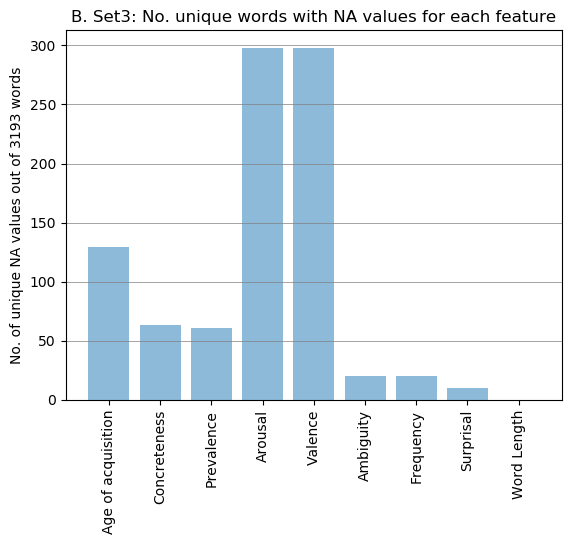

129 63 61 298 298 20 20 10 0


In [153]:
objects = ('Age of acquisition', 'Concreteness', 'Prevalence', 'Arousal', 'Valence','Ambiguity','Frequency','Surprisal', 'Word Length') #'Ambiguity', 'Log lexical freq', 'Lexical surprisal')
y_pos = np.arange(len(objects))
counts = [len(aoaU),len(concU),len(prevU),len(arU),len(valU),len(ambU),len(freqU),len(surpU),lenU]

plt.grid(color='grey', which='both',linestyle='-', axis='y',linewidth=0.5)
plt.bar(y_pos, counts, align='center',alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('No. of unique NA values out of 3193 words')
plt.title('B. Set3: No. unique words with NA values for each feature')
plt.savefig('B_set3.png',bbox_inches = 'tight')

plt.show()
print(len(aoaU),len(concU),len(prevU),len(arU),len(valU),len(ambU),len(freqU),len(surpU),lenU)


### Finding unique NAs for all features! 

In [99]:
big_u_lst=aoaUlst+concUlst+prevUlst+arUlst+valUlst+ambUlst+freqUlst+surpUlst

In [100]:
u_lst=list(set(big_u_lst))

In [101]:
u_lst=sorted(u_lst)

In [102]:
print(len(big_u_lst))
print(len(u_lst))

# No. of unique NAs is 303

899
300


In [104]:
# Write u_lst to excel file

wb = xl.Workbook('set3_unique_NA.xlsx')
sheet1 = wb.add_worksheet('sheet1')

sheet1.write('A1','Word')
add_counter = 0
for word in u_lst:
    add_counter += 1
    sheet1.write(add_counter,0,word)


### c. average proportion of words with NAs per sentence (mean across sentences with SEM = standard error of the mean over sentences)


In [105]:
# number of words for each sentence

# f1g contains the sentences
print(f1g[0:2])

w_count = 0
w_lst=[] #Number of words within each sentence
for sentence in f1g:
    for word in sentence:
        w_count +=1 
        
    w_lst.append(w_count)

    w_count=0

# print(w_lst)

[['Beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats.'], ['It', 'is', 'in', 'every', "beekeeper's", 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen.']]


###  Function for avg. proportion of words with NAs per sentences

In [106]:
def avgNA(tuplelst):
    count = 0
    avgNA = []
    for tup in tuplelst:
        if tup[1].count('#NA') == 1 or tup[1].count('[#NA]') == 1:
            count += 1
            
        for char in tup[0]:
            if char != '.':
                continue
            if char == '.':
                avgNA.append(count)
                count = 0
                
    divLst = np.divide(avgNA,w_lst)
    meanLst = np.mean(divLst)
    return meanLst, divLst


In [107]:
#print(aoaNA,concNA,prevNA,arNA,valNA,ambNA,freqNA,surpNA,lenNA)

aoaMergeT2 = list(zip(wordlst,aoaMerge)) #aoaMerge TUPLE
concMergeT2 = list(zip(wordlst,concMerge)) 
prevMergeT2 = list(zip(wordlst,prevMerge)) 
arMergeT2 = list(zip(wordlst,arMerge)) 
valMergeT2 = list(zip(wordlst,valMerge)) 
ambMergeT2 = list(zip(wordlst,ambMerge)) 
freqMergeT2 = list(zip(wordlst,freqMerge)) 
surpMergeT2 = list(zip(wordlst,surpVals))

In [108]:
print(freqMergeT2[0:10])

[('Beekeeping', [0.477121254719662]), ('encourages', [1.51851393987789]), ('the', [6.1766436197553]), ('conservation', [1.51851393987789]), ('of', [5.77117577156368]), ('local', [3.32817566143832]), ('habitats.', [1.07918124604762]), ('It', [5.98394771743588]), ('is', [5.662440491974]), ('in', [5.69761724386273])]


In [109]:
aoaAvgNA, aoaDiv = avgNA(aoaMergeT2)
concAvgNA, concDiv = avgNA(concMergeT2)
prevAvgNA, prevDiv = avgNA(prevMergeT2)
arAvgNA, arDiv = avgNA(arMergeT2)
valAvgNA, valDiv = avgNA(valMergeT2)
ambAvgNA, ambDiv = avgNA(ambMergeT2)
freqAvgNA, freqDiv = avgNA(freqMergeT2)
surpAvgNA, surpDiv = avgNA(surpMergeT2)
lenAvgNA = 0


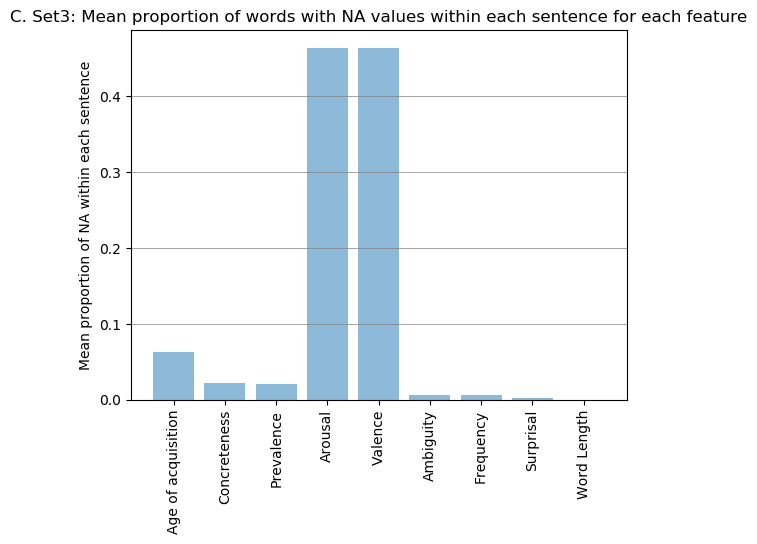

0.06252829043363385 0.022373777682324104 0.021344971097961962 0.46368294002978483 0.46368294002978483 0.006769901564076544 0.006769901564076544 0.002846809405690268 0


In [155]:
objects = ('Age of acquisition', 'Concreteness', 'Prevalence', 'Arousal', 'Valence','Ambiguity','Frequency','Surprisal', 'Word Length') #'Ambiguity', 'Log lexical freq', 'Lexical surprisal')
y_pos = np.arange(len(objects))
counts = [aoaAvgNA,concAvgNA,prevAvgNA,arAvgNA,valAvgNA,ambAvgNA,freqAvgNA,surpAvgNA,lenAvgNA]

plt.grid(color='grey', which='both',linestyle='-', axis='y',linewidth=0.5)
plt.bar(y_pos, counts, align='center',alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Mean proportion of NA within each sentence')
plt.title('C. Set3: Mean proportion of words with NA values within each sentence for each feature')
plt.savefig('C_set3.png',bbox_inches = 'tight')

plt.show()

print(aoaAvgNA,concAvgNA,prevAvgNA,arAvgNA,valAvgNA,ambAvgNA,freqAvgNA,surpAvgNA,lenAvgNA)

### e. Proportion of sentences where c. is 0.50 or higher 

In [160]:
# print(valDiv)
# valDiv > 0.5

### Function for computing no of sentences where c. is >= 0.5

In [112]:
def findProp(divlst):
    propLst = []
    for val in divlst:
        if val >= 0.5:
            propLst.append(val)
    
    return len(propLst)

In [113]:
aoaProp = findProp(aoaDiv)
concProp = findProp(concDiv)
prevProp = findProp(prevDiv)
arProp = findProp(arDiv)
valProp = findProp(valDiv)
ambProp = findProp(ambDiv)
freqProp = findProp(freqDiv)
surpProp = findProp(surpDiv)
lenProp = 0


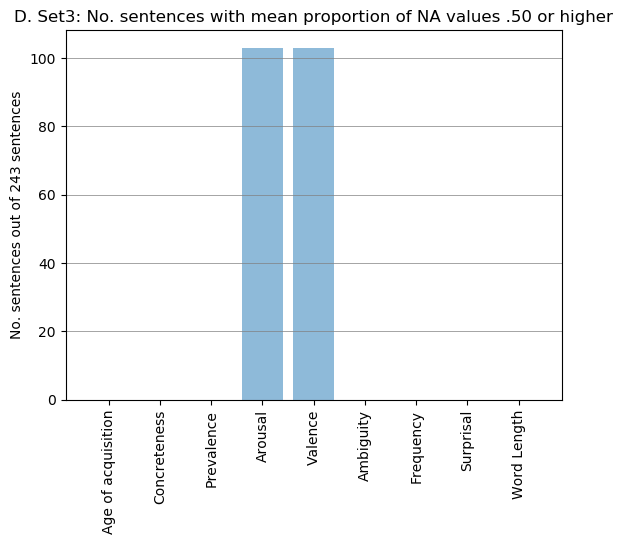

0 0 0 103 103 0 0 0 0


In [156]:
objects = ('Age of acquisition', 'Concreteness', 'Prevalence', 'Arousal', 'Valence','Ambiguity','Frequency','Surprisal','Word Length') #'Ambiguity', 'Log lexical freq', 'Lexical surprisal')
y_pos = np.arange(len(objects))
counts = [aoaProp,concProp,prevProp,arProp,valProp,ambProp,freqProp,surpProp,lenProp] 

plt.grid(color='grey', which='both',linestyle='-', axis='y',linewidth=0.5)
plt.bar(y_pos, counts, align='center',alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('No. sentences out of 243 sentences')
plt.title('D. Set3: No. sentences with mean proportion of NA values .50 or higher')
plt.savefig('D_set3.png',bbox_inches = 'tight')

plt.show()
print(aoaProp,concProp,prevProp,arProp,valProp,ambProp,freqProp,surpProp,lenProp)


### Averaging sentences

In [ ]:
# Approach. For each sentence (.), 
# I need a 9 dimensional vector for each sentence. 

# For e.g. first sentence, AoA. 7 words. 6 vals. Take out the word with a NA value. Use the rest for computing avg. 

# Read in excel row as a tuple. If tup[1] to tup[6] are NAs, remove that word. Add tuples collected together in sentences. 

In [86]:
# wordvals_sur=[]

# for i in surplist:
#     if i == ['#NA']
    
#     wordvals_sur.append([float(i)])
    
# print(wordvals_sur)

In [115]:
print(len(wordlen)) #wordlen is the list to use for averaging word lengths within sentence 

3193


In [116]:
surpMerge = surpVals

In [117]:
# Creating a tuple of all the values I want to find averages for 

test_tup = list(zip(aoaMerge,concMerge,prevMerge,arMerge,valMerge,ambMerge,freqMerge,surpMerge,wordlen))

In [118]:
print(test_tup[0:5])

[([9.16], [4.07], [1.8844805743060429], ['#NA'], ['#NA'], [1.0], [0.477121254719662], '21.130', 10), ([8.5], [2.61], [2.2499431436174864], [4.38], [7.16], [1.0], [1.51851393987789], '16.828', 10), ([3.983747], [1.43], [2.3282280026491335], ['#NA'], ['#NA'], [0.999315555093483], [6.1766436197553], '4.687', 3), ([10.78], [2.41], [2.5758293035489], [3.17], [5.2], [0.78125], [1.51851393987789], '14.483', 12), ([4.548568000000001], [1.67], [2.3175058844395875], ['#NA'], ['#NA'], [0.9384718419111725], [5.77117577156368], '5.502', 2)]


In [119]:
print(surpMerge)

['21.130', '16.828', '4.687', '14.483', '5.502', '11.104', '17.376', '7.727', '6.985', '6.137', '11.621', '21.652', '12.275', '5.618', '18.501', '11.104', '14.018', '7.454', '14.040', '18.147', '8.051', '6.037', '16.517', '11.531', '5.502', '14.317', '7.727', '10.891', '7.823', '13.444', '7.454', '14.049', '16.584', '7.957', '16.577', '5.618', '10.523', '10.930', '6.651', '16.198', '21.652', '9.917', '18.515', '4.687', '9.693', '5.502', '17.266', '7.312', '16.198', '11.101', '9.399', '10.945', '14.549', '4.687', '22.281', '21.561', '21.652', '10.467', '5.618', '18.262', '6.651', '9.573', '15.138', '9.220', '9.573', '10.545', '6.985', '13.598', '4.687', '13.837', '21.561', '[#NA]', '18.019', '11.619', '5.519', '13.484', '10.342', '13.933', '5.519', '16.530', '5.618', '14.040', '4.687', '15.912', '15.866', '21.652', '12.272', '26.506', '5.502', '9.573', '22.281', '9.399', '16.558', '4.687', '13.838', '10.927', '9.840', '18.974', '15.753', '5.519', '11.787', '4.687', '10.647', '13.324', '

In [120]:
# This version uses wordlst as the key, BUT the values correspond to the lemmatized list. Wordlst_lem DOES NOT have '.', i.e. it's harder to use.

d = {} # Overall dictionary 
sentence_num = 1
cnt = 0
d[1] = {} #The first sentence dictionary, which contains all the words for sentence 1

while cnt < len(wordlst):
    
    if wordlst[cnt][-1] == '.': # Checking the last char of each word
        d[sentence_num][wordlst[cnt]] = [] # Creating a new empty dict for the given word.
        flag = False
        for feat in test_tup[cnt]: # Iterating through each feature in the tuple list for the respective count
            if feat == ['#NA'] or feat == '[#NA]':
                flag = True
                break
            else:
                
                d[sentence_num][wordlst[cnt]].append(feat) # appending each feature if it is NOT a #NA
        if flag: 
            del d[sentence_num][wordlst[cnt]]
        sentence_num += 1
        d[sentence_num] = {} # When every feature is appended for reach word, a new dict is created for the next sentence
        cnt += 1
    else:
        d[sentence_num][wordlst[cnt]] = [] #If the character is not . appending the feature for the respective word
        #d[sentence_num][wordlst[cnt]].append(i)
        flag = False
        for feat in test_tup[cnt]:
            if feat == ['#NA'] or feat == '[#NA]':
                flag = True
                break
            else:
                d[sentence_num][wordlst[cnt]].append(feat)
        if flag:
            del d[sentence_num][wordlst[cnt]]
        cnt += 1    

In [121]:
for key in d.keys():
    for value in d[key]:
        print(key,value)

1 encourages
1 conservation
1 local
1 habitats.
2 is
2 interest
2 conserve
2 local
2 plants
2 produce
2 pollen.
3 passive
3 form
3 agriculture,
3 does
3 require
3 native
3 vegetation
3 be
3 cleared
3 make
3 way
3 crops.
4 discourage
4 use
4 crops,
4 kill
5 go
5 craft,
5 product
5 is
5 effort.
6 emphasizes
6 quality
6 character
6 quantity
6 consistency.
7 produce
7 honey,
7 become
8 scout
8 fields,
8 know
8 nectar
8 flows,
8 select
8 ways
8 extract
8 honey.
9 opens
9 hive,
9 deep
9 bees
9 fills
9 air.
10 checks
10 honey
10 stores,
10 pollen
10 supplies,
10 bee
10 nursery.
11 Bees
11 crawl
11 bare
11 arms
11 hands,
11 sting,
11 gentle.
12 have
12 recurring
12 dream
12 college.
13 dream,
13 day
13 final
13 exam
13 realize
13 gone
13 class.
14 done
14 assignments.
15 know
15 other
15 people
15 have
15 nightmare.
16 morning,
16 participants
16 study
16 had
16 write
16 dream
16 experience
16 previous
16 night.
17 recorded
17 recalled
17 dreams,
17 described
17 dream
17 emotional
17 intensity

116 grooms
116 are
116 making
116 personal
116 statements
116 wedding
116 attire.
117 jackets
117 are
117 cutting
117 edge
117 wedding
117 fashion
118 Grooms
118 are
118 jazzing
118 tuxedos
118 colorful
118 shirts
118 satin
118 ties.
119 tuxedo
119 jacket
119 is
119 dinner
119 black
119 silk
119 lapels.
120 Black
120 tie
120 trousers
120 be
120 perfect
120 match
120 tuxedo
120 jacket.
121 shirt
121 be
121 plain
121 white
121 tie
121 black
121 match
121 jacket
121 lapels.
122 concert
122 pianist
122 went
122 blind
122 adulthood.
123 blindness
123 was
123 caused
123 genetic
123 condition
123 damaged
123 eyes.
124 told
124 interviewers
124 being
124 blind
124 was
124 advantage
124 pianist.
125 had
125 visual
125 distractions,
125 concentrate
125 music.
126 government
126 defines
126 blindness
126 vision
126 insufficient
126 ordinary
126 activities
126 life.
127 establishing
127 legal
127 blindness,
127 resources
127 can
127 be
127 focused
127 blind.
128 may
128 overlook
128 have
128 visio

225 climb
225 vertical
225 rock
225 faces.
226 boys
226 trip
226 were
226 new
226 rock
227 were
227 afraid
227 heights.
228 Having
228 check
228 knots
228 harnesses
228 helped
228 calm
229 adults
229 set
229 climbing
229 routes
229 appropriate
229 beginners.
230 is
230 one
230 particular
230 style
230 rock
231 climber
231 relies
231 skill
231 physical
231 strength
231 ascend
231 rock
231 face.
232 Rope
232 bolts
232 are
232 equipment
233 are
233 meant
233 stop
233 climber
233 falls.
234 skied
234 steep
234 trail
234 buddies
234 convinced
234 try.
235 made
235 bad
235 turn
235 found
235 tumbling
236 came
236 stop
236 flat
236 part
236 slope.
237 skis
237 were
237 be
237 found
237 poles
237 lodged
237 snow
237 drift
237 hill.
238 major
238 strength
238 professional
238 skiers
238 is
238 use
238 ski
238 poles.
239 Proper
239 use
239 ski
239 poles
239 improves
239 balance
239 adds
239 flair
239 skiing.
240 minimizes
240 need
240 upper
240 body
240 movements
240 regain
240 lost
240 balance


In [128]:

feat_names=['aoa','conc','prev','ar','val','amb','freq','surp','len']

sentence_lengths = ['Sentence Lengths:']
avg_feat_val =  {}
for sent in d:
    if sent == 244: # Only 384/243 sentences! 
        break
    avg_feat_val[sent] = {}
    for feat_name in feat_names:
        if feat_name not in avg_feat_val[sent]:
            avg_feat_val[sent][feat_name] = 0
    for word in d[sent]:    

        word_feats = d[sent][word]
        i = 0
        #print(word_feats)
        #print(len(d[sent]))
        for feat_name in feat_names:
            try:
                avg_feat_val[sent][feat_name] += word_feats[i][0] / len(d[sent])
            except TypeError:
                avg_feat_val[sent][feat_name] += float(word_feats[i]) / len(d[sent])
            i += 1
        


In [129]:
avg_feat_val

{1: {'aoa': 9.3775,
  'conc': 2.9899999999999998,
  'prev': 2.377219445899259,
  'ar': 3.6025,
  'val': 6.244999999999999,
  'amb': 0.9397856890874883,
  'freq': 1.86109619681043,
  'surp': 14.94775,
  'len': 8.75},
 2: {'aoa': 7.078571428571427,
  'conc': 3.045714285714286,
  'prev': 2.322470373481911,
  'ar': 3.707142857142857,
  'val': 6.134285714285714,
  'amb': 0.9653409654020819,
  'freq': 3.042761829012187,
  'surp': 13.581428571428571,
  'len': 5.999999999999999},
 3: {'aoa': 7.2875,
  'conc': 2.9583333333333335,
  'prev': 2.3770007964359277,
  'ar': 3.433333333333333,
  'val': 5.7475,
  'amb': 0.975165483388535,
  'freq': 3.2408123465703857,
  'surp': 13.293166666666664,
  'len': 5.833333333333334},
 4: {'aoa': 6.949999999999999,
  'conc': 3.205,
  'prev': 2.354020379208954,
  'ar': 4.4799999999999995,
  'val': 3.98,
  'amb': 0.9607895433189815,
  'freq': 3.1432956569428177,
  'surp': 14.73875,
  'len': 5.5},
 5: {'aoa': 6.104000000000001,
  'conc': 2.9440000000000004,
  'prev

In [130]:
avg_feat_val2 = avg_feat_val.items()

print(len(avg_feat_val2))

243


In [132]:
# Prepping the MATLAB structure 

vlst = []

for k,v in avg_feat_val2:
    vlst.append(v.items())
    
#print(vlst)
    
flatAvg = []
for entry in vlst:
    for ele in entry:
        for i in ele:
            flatAvg.append(i)

print(len(flatAvg))
print(len(vlst))

# For set 3:
9*384*2

# For set 2
9*243*2

4374
243


4374

In [133]:

newnum = flatAvg[1::2]
#print(newnum)

In [134]:
def split_list(alist, wanted_parts=1):
    length = len(alist)
    return [ alist[i*length // wanted_parts: (i+1)*length // wanted_parts] 
             for i in range(wanted_parts) ]

In [135]:
splitlst = split_list(newnum,243)

In [136]:
print(splitlst) #Contains 384x9 vals or 243x9 vals

[[9.3775, 2.9899999999999998, 2.377219445899259, 3.6025, 6.244999999999999, 0.9397856890874883, 1.86109619681043, 14.94775, 8.75], [7.078571428571427, 3.045714285714286, 2.322470373481911, 3.707142857142857, 6.134285714285714, 0.9653409654020819, 3.042761829012187, 13.581428571428571, 5.999999999999999], [7.2875, 2.9583333333333335, 2.3770007964359277, 3.433333333333333, 5.7475, 0.975165483388535, 3.2408123465703857, 13.293166666666664, 5.833333333333334], [6.949999999999999, 3.205, 2.354020379208954, 4.4799999999999995, 3.98, 0.9607895433189815, 3.1432956569428177, 14.73875, 5.5], [6.104000000000001, 2.9440000000000004, 2.2469816114224135, 3.9800000000000004, 6.17, 0.9893604768341608, 3.8565900329283185, 11.394400000000001, 4.3999999999999995], [9.579999999999998, 2.526, 2.402945103138272, 3.7560000000000002, 6.036, 1.0, 2.150719100043515, 14.716999999999999, 9.0], [6.346666666666667, 3.243333333333333, 2.4835271339807092, 3.6799999999999997, 6.720000000000001, 0.9680846884562402, 3.5

In [137]:
sio.savemat('set3_lex_features.mat', mdict={'my_list': splitlst})